## Load Packages

In [1]:
#LIBRARY TO USE

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import pandas as pd
from matplotlib import pyplot as plt
import datetime

## Data Importation and Data Wrangling

- The dataset for this project is [Data on COVID-19 (coronavirus) by Our World in Data](https://github.com/owid/covid-19-data/tree/master/public/data). Which is a  complete COVID-19 dataset collection of the COVID-19 data maintained by -Our World in Data](https://ourworldindata.org/coronavirus). The data is updated daily throughout the duration of the COVID-19 pandemic.

- For the purpose of this project, I concentrated on the Covid-19 information on the United States.

- And the following columns were selected for visualization purposes:
    - total_cases:	Total confirmed cases of COVID-19. Counts can include probable cases, where reported.
    - new_cases:	New confirmed cases of COVID-19. Counts can include probable cases, where reported. In rare cases where oursource reports a negative daily change due to a data correction, we set this metric to NA.
    - total_deaths	Total deaths attributed to COVID-19. Counts can include probable deaths, where reported.
    - new_deaths	New deaths attributed to COVID-19. Counts can include probable deaths, where reported. In rare cases where our source reports a negative daily change due to a data correction, we set this metric to NA.
    - icu_patients	Number of COVID-19 patients in intensive care units (ICUs) on a given day.
    - hosp_patients	Number of COVID-19 patients in hospital on a given day
    - total_tests	Total tests for COVID-19
    - new_tests	New tests for COVID-19 (only calculated for consecutive days)
    - total_vaccinations	Total number of COVID-19 vaccination doses administered
    - people_vaccinated	Total number of people who received at least one vaccine dose
    - people_fully_vaccinated	Total number of people who received all doses prescribed by the initial vaccination protocol
    

## Pre-processing
- Because the main attributes for this project is the hospitalisation and ICU, rows with missing values in these two columns were deleted and the resulting data frame was saved and imported for the visualisation.

In [2]:
Covid_19 = pd.read_csv("owid-covid-data.csv")
covid = pd.DataFrame(Covid_19)

In [3]:
covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309683,ZWE,Africa,Zimbabwe,2023-05-06,264685.0,0.0,0.857,5686.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
309684,ZWE,Africa,Zimbabwe,2023-05-07,264685.0,0.0,0.286,5686.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
309685,ZWE,Africa,Zimbabwe,2023-05-08,264776.0,91.0,13.000,5689.0,3.0,0.429,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
309686,ZWE,Africa,Zimbabwe,2023-05-09,264776.0,0.0,13.000,5689.0,0.0,0.429,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


## Variables for analysis

In order to better understand if any the association between continuous outcomes, we focused on exploring the continous variables:
 - Median Age and 
 - Life Expectancy
 And categorical variable
 - Continents

In [4]:
#SUBSETING CONTINENT< MEDIAN AGE AND LIFE EXPECTANCY

Covid_continent = covid.loc[:,"continent"]

Covid_med_age = covid.loc[:,"median_age"]

Covid_life = covid.loc[:,"life_expectancy"]


### Continent vs Median Age




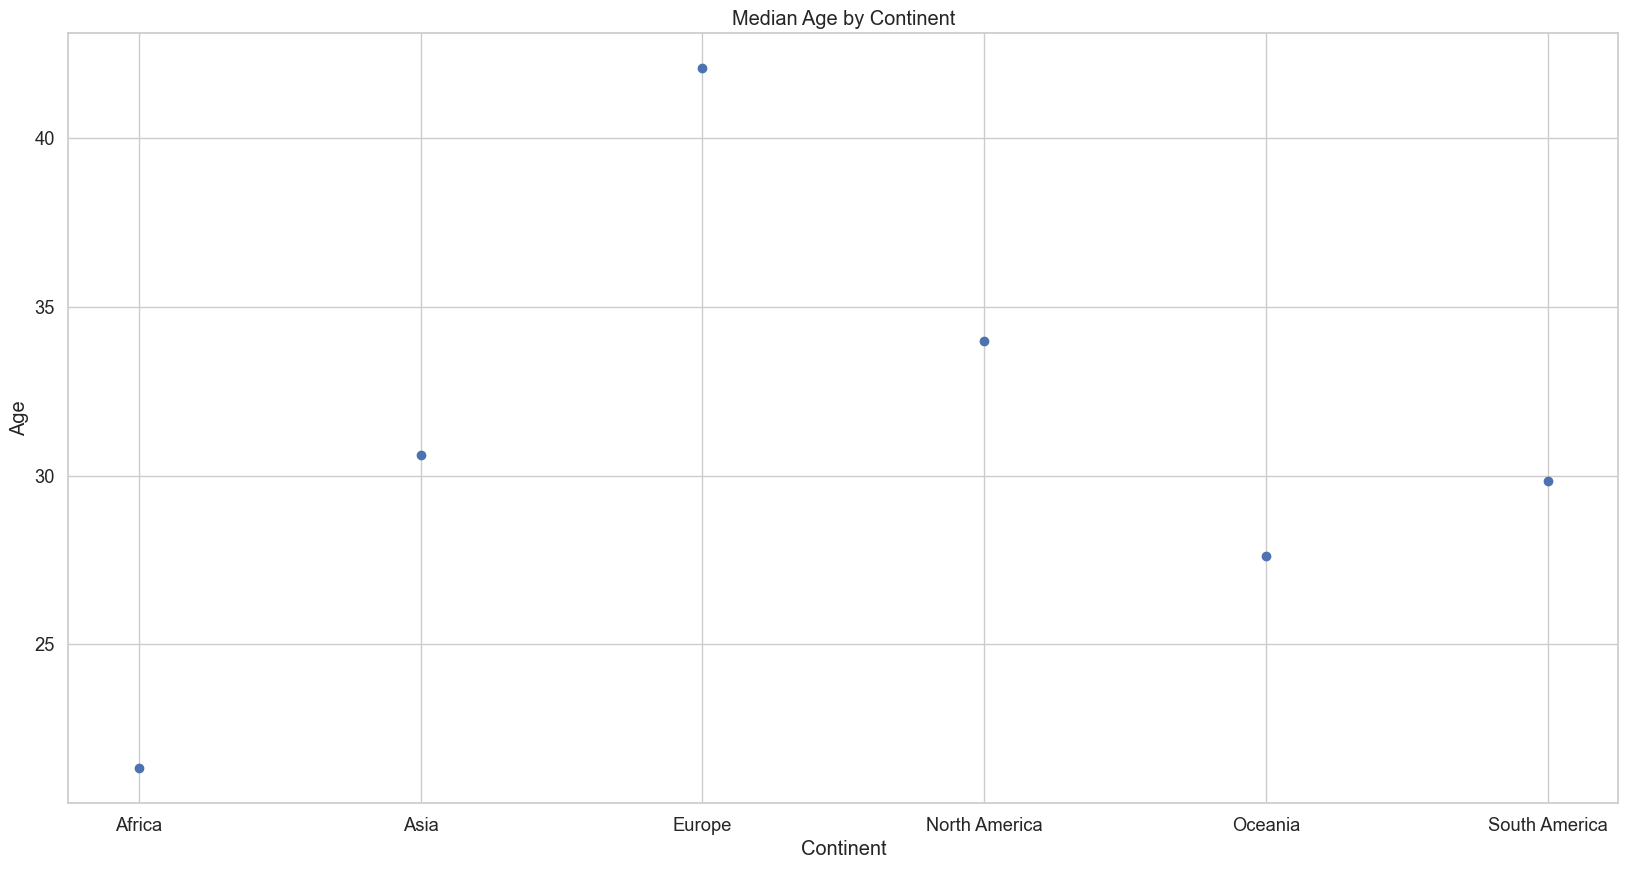

In [12]:

# create a pandas DataFrame combining the two datasets
data = pd.DataFrame({'continent': Covid_continent, 'median_age':Covid_med_age })

# calculate the median age by continent
median_age_by_continent = data.groupby('continent')['median_age'].mean()

# create a scatter plot
sns.set_style("whitegrid")
plt.figure(figsize=(20, 10))
plt.scatter(x=median_age_by_continent.index, y=median_age_by_continent.values)
plt.xlabel('Continent')
plt.ylabel('Age')
plt.title('Median Age by Continent')
plt.show()

- From the plot above, it can be observed that, the continent with the highest median age is Europe with their median age of over 40 years, closely followed by the North American continent with a median age very close to 35 years.

- Africa has the least median age of slightly above 20 years.

- From these values, it is quite clear as to why more people in Europe and North America were affected with the covid-19
- And very less records of these cases for the African continent.


## Box plot

The side by side box plot helps visualizes that Europe actual have a very high old age population who were recored with covid-19 cases and this visualization actual help the audience to understand the covid demographic with respect to the median age.

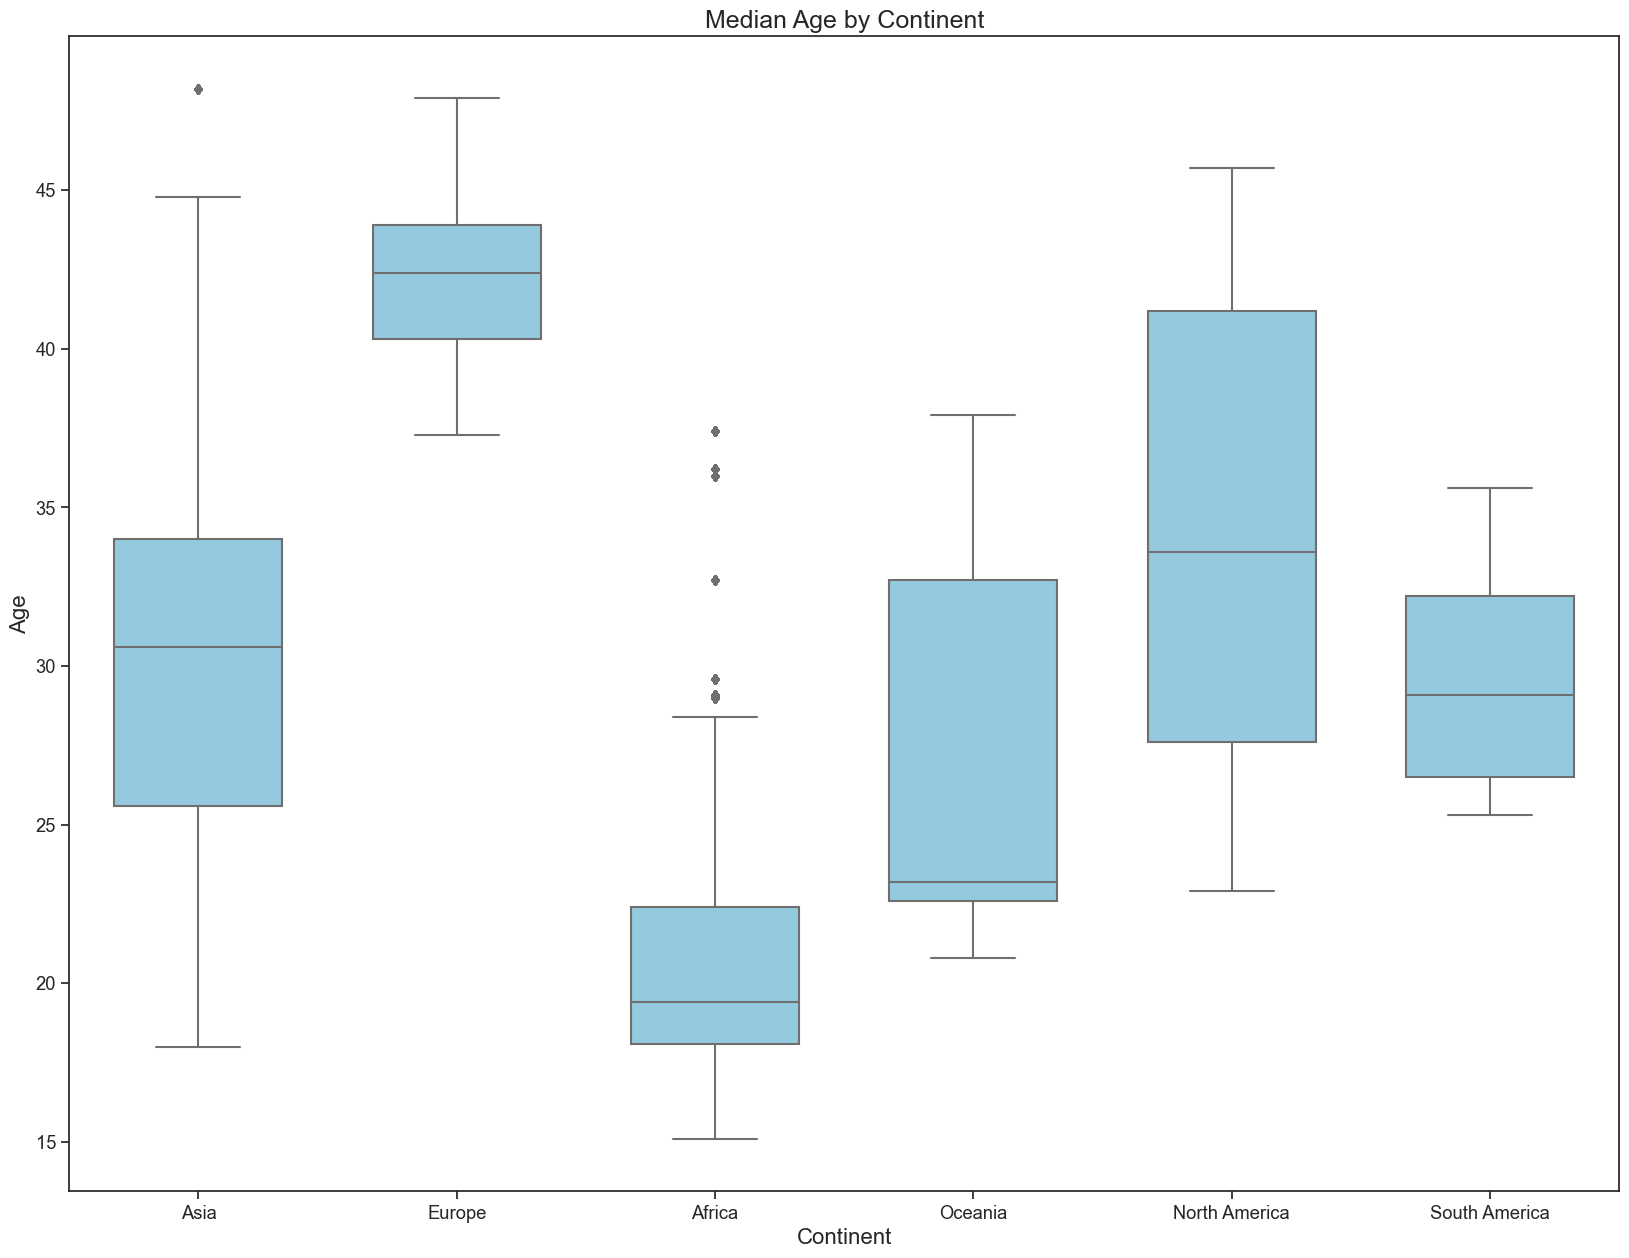

In [9]:

# create a pandas DataFrame combining the two datasets
data = pd.DataFrame({'continent': Covid_continent, 'median_age':Covid_med_age, 'Covid_life': Covid_life})

# set style and font size
sns.set(style="ticks", font_scale=1.2)

# create a box plot side by side
plt.figure(figsize=(20, 15))
sns.boxplot(x='continent', y='median_age', data=data, width=0.65, color='skyblue')
#sns.boxplot(x='continent', y='Covid_life', data=data, width=0.4, color='pink')
plt.xlabel('Continent', fontsize=16)
plt.ylabel('Age', fontsize=16)
plt.title('Median Age by Continent', fontsize=18)
plt.show()


To better understand the distribution of the median age, we used a side-by-side box plot to visualise the median age across the different continents.

From the plot above, it can be observed that:
- The median age of the people of the Asian continent is slightly left skewed with the presence of an outlier
- Regards to Europe and North America, we can observe that they are kinda symmetrical, with no presence of any outliers, implying that the proportions of the young and old is almost the same. (Which to me is a little stange because I though that Europe had a higher older generation)
- Africa is very much skewed to the right with the presence of several outliers. It can be observed that, the maximum age of Africans is less than the median ages of people from thye Asian and North American continents.
- Finally, Oceania on the other hand is extremely right skewed.
- The North American and the Oceania continents, have median ages which are very widely spread out unlike their counterparts in Europe, African and South America, whose median ages are very much close together with less variability.

### LIFE EXPECTANCY

The Visualization below shows the Life Expectance and Continent, this will help the audience to be able to know which country has the lowest and highest Life Expectancy when tested for Covid-19 by Continent.

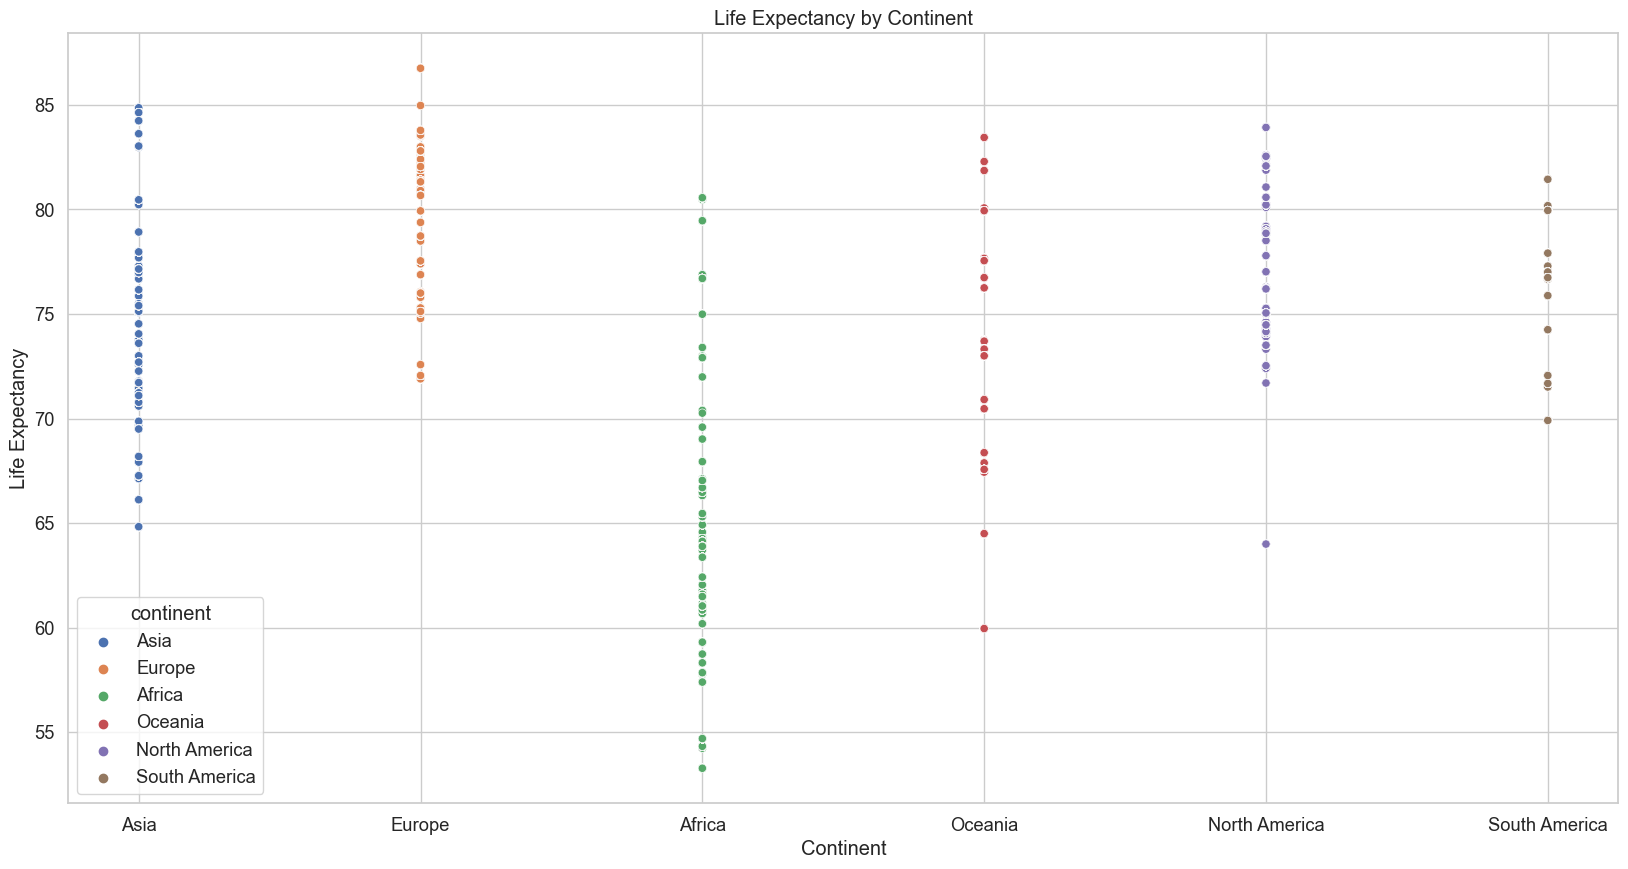

In [10]:
# create a pandas DataFrame combining the two datasets
data = pd.DataFrame({'continent': Covid_continent, 'Covid_life':Covid_life })

# create a scatter plot
sns.set_style("whitegrid")
plt.figure(figsize=(20, 10))
sns.scatterplot(data=data, x="continent", y="Covid_life", hue="continent")
plt.xlabel('Continent')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy by Continent')
plt.show()

The box plot side by side actually depicts the visualisation of the Life Expectancy. We can see that Europe has a highest risk while Africans have a very low risk when it comes to the covid-19 and this actually supports the earlier visualization about the median age of African being below 25 years. We know from that younger people do not easily get covid-19 and this clear from the visualization.

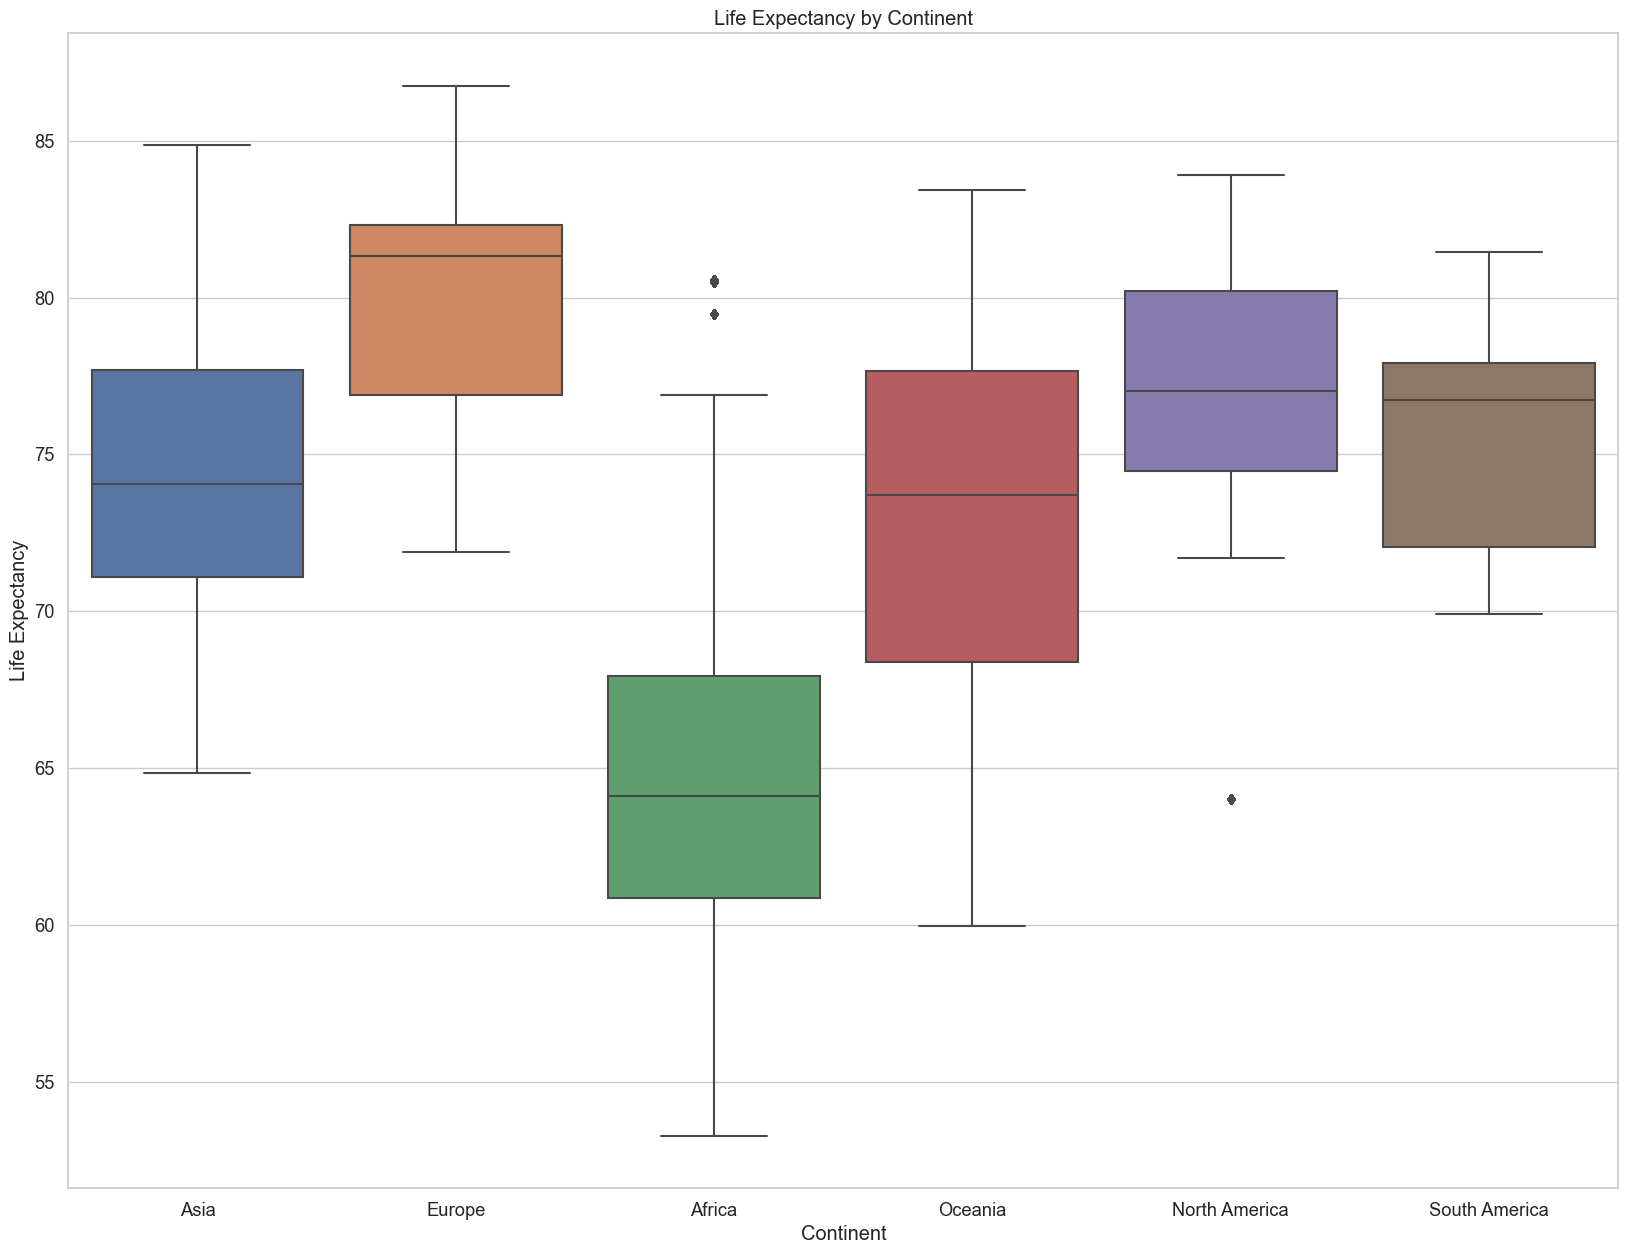

In [11]:


# create a pandas DataFrame combining the two datasets
data = pd.DataFrame({'continent': Covid_continent, 'Covid_life':Covid_life })

# create a boxplot
sns.set_style("whitegrid")
plt.figure(figsize=(20, 15))
ax = sns.boxplot(x="continent", y="Covid_life", data=data,width=0.82)
ax.set(xlabel='Continent', ylabel='Life Expectancy', title='Life Expectancy by Continent')
plt.show()

We finally plotted the life expectancy across various continents.
- As per the median age, it can be seen that the continent with the highest life expectancy, is Europe with a median value of over 80 years and minimum and maximum values of 72 and 87 years respectively.
- North America has a median life expectancy of 77 years with 72 and 84years being the minimum and maximum values respectively.
- Africa as usual, has the least life expectancy, with a median value of 64, minimum value of 53 and maximum life expectancy of 77
- It can be observed that the life expectancy of Europe and South America is very much skewed to the left.
- While that of Asia, Africa and North America is slightly symmetirc.
- Oceania had the high